In this AI Model we:

1. We will collect a stock data.
2. Converting the raw data into model readable form.
3. Preprocessing the extracted data to train and test.
4. Creating a stacked LSTM module that learns from the following data.
5. Predicting the test data and the plotting the output.
6. Predicting the future 30 days stock data and plotting it.


In [2]:
### Data Collection
import pandas as pd
key="efac643ff78d14b1e53916741f21b4bd5fa32a5b"

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('INFY.NS.csv')

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
df

close    high     low   open    volume  \
symbol date                                                                
INFY   2017-11-15 00:00:00+00:00  14.84  14.960  14.320  14.88   2088980   
       2017-11-16 00:00:00+00:00  15.27  15.390  15.210  15.23   5950254   
       2017-11-17 00:00:00+00:00  15.19  15.220  15.115  15.15   3214438   
       2017-11-20 00:00:00+00:00  15.08  15.150  15.010  15.13   2087313   
       2017-11-21 00:00:00+00:00  15.12  15.230  15.090  15.17   3095969   
...                                 ...     ...     ...    ...       ...   
       2022-11-07 00:00:00+00:00  18.58  18.655  18.250  18.25   6280454   
       2022-11-08 00:00:00+00:00  18.74  18.950  18.620  18.70   6187628   
       2022-11-09 00:00:00+00:00  18.48  18.745  18.470  18.51  10196197   
       2022-11-10 00:00:00+00:00  19.20  19.285  18.920  19.09   9283014   
       2022-11-11 00:00:00+00:00  19.75  19.790  19.355  19.51   6249880   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
INFY   2017-11-15 00:00:00+00:00   6.498560   6.551109   6.270848   6.516076   
       2017-11-16 00:00:00+00:00   6.686860   6.739409   6.660586   6.669344   
       2017-11-17 00:00:00+00:00   6.651828   6.664965   6.618985   6.634311   
       2017-11-20 00:00:00+00:00   6.603658   6.634311   6.573004   6.625553   
       2017-11-21 00:00:00+00:00   6.621174   6.669344   6.608037   6.643070   
...                                     ...        ...        ...        ...   
       2022-11-07 00:00:00+00:00  18.580000  18.655000  18.250000  18.250000   
       2022-11-08 00:00:00+00:00  18.740000  18.950000  18.620000  18.700000   
       2022-11-09 00:00:00+00:00  18.480000  18.745000  18.470000  18.510000   
       2022-11-10 00:00:00+00:00  19.200000  19.285000  18.920000  19.090000   
       2022-11-11 00:00:00+00:00  19.750000  19.790000  19.355000  19.510000   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
INFY   2017-11-15 00:00:00+00:00    4177960      0.0          1.0  
       2017-11-16 00:00:00+00:00   11900508      0.0          1.0  
       2017-11-17 00:00:00+00:00    6428876      0.0          1.0  
       2017-11-20 00:00:00+00:00    4174626      0.0          1.0  
       2017-11-21 00:00:00+00:00    6191938      0.0          1.0  
...                                     ...      ...          ...  
       2022-11-07 00:00:00+00:00    6280454      0.0          1.0  
       2022-11-08 00:00:00+00:00    6187628      0.0          1.0  
       2022-11-09 00:00:00+00:00   10196197      0.0          1.0  
       2022-11-10 00:00:00+00:00    9283014      0.0          1.0  
       2022-11-11 00:00:00+00:00    6249880      0.0          1.0  

[1257 rows x 12 columns]

In [ ]:
df.to_csv('INFY.csv')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('INFY.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,INFY,2017-11-15 00:00:00+00:00,14.84,14.96,14.320,14.88,2088980,6.498560,6.551109,6.270848,6.516076,4177960,0.0,1.0
1,INFY,2017-11-16 00:00:00+00:00,15.27,15.39,15.210,15.23,5950254,6.686860,6.739409,6.660586,6.669344,11900508,0.0,1.0
2,INFY,2017-11-17 00:00:00+00:00,15.19,15.22,15.115,15.15,3214438,6.651828,6.664965,6.618985,6.634311,6428876,0.0,1.0
3,INFY,2017-11-20 00:00:00+00:00,15.08,15.15,15.010,15.13,2087313,6.603658,6.634311,6.573004,6.625553,4174626,0.0,1.0
4,INFY,2017-11-21 00:00:00+00:00,15.12,15.23,15.090,15.17,3095969,6.621174,6.669344,6.608037,6.643070,6191938,0.0,1.0


In [ ]:
df1=df.reset_index()['close']

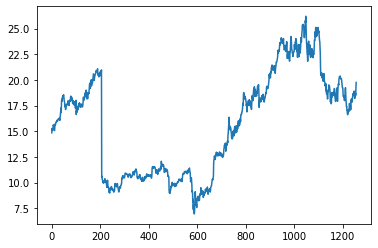

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
import numpy as np
df1

0       14.84
1       15.27
2       15.19
3       15.08
4       15.12
        ...  
1252    18.58
1253    18.74
1254    18.48
1255    19.20
1256    19.75
Name: close, Length: 1257, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.41017653]
 [0.4325026 ]
 [0.42834891]
 ...
 [0.59916926]
 [0.63655244]
 [0.66510903]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(817, 440)

In [ ]:
train_data

array([[0.41017653],
       [0.4325026 ],
       [0.42834891],
       [0.42263759],
       [0.42471443],
       [0.42886812],
       [0.45015576],
       [0.44600208],
       [0.44755971],
       [0.44444444],
       [0.44755971],
       [0.42159917],
       [0.4423676 ],
       [0.45430945],
       [0.44755971],
       [0.45327103],
       [0.45379024],
       [0.46313603],
       [0.46573209],
       [0.46469367],
       [0.46521288],
       [0.47352025],
       [0.47248183],
       [0.46988577],
       [0.47040498],
       [0.47507788],
       [0.47559709],
       [0.48130841],
       [0.47975078],
       [0.47871236],
       [0.48182762],
       [0.4854621 ],
       [0.47819315],
       [0.47300104],
       [0.48857736],
       [0.4953271 ],
       [0.50882658],
       [0.52180685],
       [0.53634476],
       [0.51246106],
       [0.56282451],
       [0.58047767],
       [0.57009346],
       [0.57372793],
       [0.58930426],
       [0.59761163],
       [0.59813084],
       [0.597

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
 # reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 374ms/step - loss: 0.0383 - val_loss: 0.0557
Epoch 2/100
12/12 [==============================] - 2s 202ms/step - loss: 0.0104 - val_loss: 0.0040
Epoch 3/100
12/12 [==============================] - 2s 206ms/step - loss: 0.0064 - val_loss: 0.0136
Epoch 4/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 5/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0043 - val_loss: 0.0031
Epoch 6/100
12/12 [==============================] - 2s 204ms/step - loss: 0.0042 - val_loss: 0.0057
Epoch 7/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0036 - val_loss: 0.0078
Epoch 8/100
12/12 [==============================] - 2s 205ms/step - loss: 0.0033 - val_loss: 0.0083
Epoch 9/100
12/12 [==============================] - 2s 206ms/step - loss: 0.0031 - val_loss: 0.0035
Epoch 10/100
12/12 [==============================] - 2s 205ms/step - loss: 0.0031 - val_l

In [ ]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

11/11 [==============================] - 0s 38ms/step


12.67395555736665

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

19.879186569506572

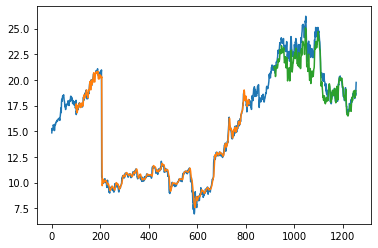

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()